In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
import sklearn.metrics as metrics

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.metrics import precision_score

In [14]:
from sklearn.metrics import recall_score

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
from sklearn.metrics import roc_curve

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.model_selection import cross_validate 

## Data Summary

The dataset for this assignment is the leading cause of death dataset from `NYC Open Data`: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

The goal of this project is to predict the sex of an individual who dies from a leading cause of death in New York City, NY.

In [20]:
cod = pd.read_csv('New_York_City_Leading_Causes_of_Death_20231119.csv')

In [21]:
cod.describe()

,Year
count,1803.000000
mean,2013.047698
std,3.767515
min,2007.000000
25%,2010.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


In [22]:
cod.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159,18.5,19.1
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149,12.6,15.7


### Step 01 - Clean Up NaN Values 

This step involves cleaning up the data to remove either placeholder values, or NaN values by replacing them with the median value for each column:

In [23]:
cod['Year'].unique()

array([2011, 2008, 2010, 2014, 2013, 2009, 2012, 2007, 2018, 2019, 2015,
       2016, 2017])

In [24]:
cod['Leading Cause'].unique()

array(['Chronic Lower Respiratory Diseases (J40-J47)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'All Other Causes',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Assault (Homicide: Y87.1, X85-Y09)',
       'Aortic Aneurysm and Dissection (I71)',
       'Diabetes Mellitus (E10-E14)', 'Septicemia (A40-A41)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q9

In [25]:
cod['Sex'].unique()

array(['M', 'F', 'Male', 'Female'], dtype=object)

In [26]:
cod['Sex'] = cod['Sex'].str.replace('Male', 'M')

In [27]:
cod['Sex'] = cod['Sex'].str.replace('Female', 'M')

In [28]:
cod['Race Ethnicity'].unique()

array(['White Non-Hispanic', 'Hispanic', 'Not Stated/Unknown',
       'Asian and Pacific Islander', 'Black Non-Hispanic',
       'Other Race/ Ethnicity', 'Non-Hispanic Black',
       'Non-Hispanic White'], dtype=object)

In [29]:
cod['Deaths'].unique()

array(['444', '3361', '150', '1146', '25', '80', '42', '159', '142',
       '149', '6', '245', '102', '169', '27', '74', '.', '129', '92',
       '11', '137', '227', '136', '299', '205', '60', '162', '2194',
       '344', '14', '138', '281', '1348', '416', '266', '146', '7', '71',
       '219', '70', '200', '21', '78', '10', '18', '2282', '56', '5',
       '156', '3408', '216', '177', '377', '88', '83', '72', '51', '2140',
       '390', '57', '187', '8', '204', '2316', '39', '507', '197', '79',
       '1852', '271', '2077', '172', '106', '49', '22', '94', '208',
       '258', '546', '209', '290', '235', '30', '3142', '132', '308',
       '1163', '37', '24', '1473', '86', '164', '1180', '55', '154',
       '1800', '89', '526', '213', '38', '186', '12', '3366', '201',
       '206', '502', '646', '95', '409', '176', '469', '115', '9', '231',
       '521', '218', '2034', '180', '295', '2165', '1207', '6297', '347',
       '59', '4495', '4085', '1326', '17', '2275', '352', '478', '1940',
  

In [30]:
cod['Deaths'] = cod['Deaths'].str.replace('.', '')

In [31]:
cod['Deaths'] = pd.to_numeric(cod['Deaths'])

In [32]:
cod['Deaths'] = cod['Deaths'].fillna(cod['Deaths'].median())

In [33]:
cod['Death Rate'].unique()

array(['33.3', '250.4', '13.1', '96', '.', '12.8', '6.7', '18.5', '10.6',
       '12.6', '23.4', '9.7', '19.9', '11', '7.7', '16.1', '16.9', '13',
       '35.1', '21.7', '17.5', '10', '11.3', '11.4', '209.1', '64.6',
       '12.1', '26.8', '110', '29.3', '31.2', '17.2', '6.8', '15.3',
       '17.3', '217.7', '4.7', '13.2', '254.1', '18', '12.5', '44.2',
       '6.2', '14.5', '8.9', '149.7', '27.1', '9.8', '16.4', '23.8',
       '172.9', '35.7', '22.8', '6.5', '176.5', '3.3', '25.9', '244.6',
       '4.2', '4.3', '15.2', '24.7', '109.6', '21.6', '20.6', '6', '234',
       '11.6', '36', '136.5', '9.1', '7', '140.7', '7.2', '8.2', '13.7',
       '105.1', '12.9', '171', '101', '25', '16.8', '4.8', '234.5',
       '23.6', '19.6', '37.4', '48.4', '13.6', '16.6', '39.1', '14.7',
       '86.8', '21.5', '16.3', '36.6', '20', '151.6', '15.6', '16.5',
       '28.2', '162.3', '104.7', '438.3', '335.1', '303.5', '126.5',
       '169.4', '2.8', '26.3', '91.8', '226.8', '8.5', '43.3', '11.9',
       

In [34]:
cod['Death Rate'] = cod['Death Rate'].str.replace('.', '')

In [35]:
cod['Death Rate'] = pd.to_numeric(cod['Death Rate'])

In [36]:
cod['Death Rate'] = cod['Death Rate'].fillna(cod['Death Rate'].median())

In [37]:
cod['Age Adjusted Death Rate'].unique()

array(['27.8', '214.3', '17.6', '143.5', '.', '14.1', '6.9', '19.1',
       '8.8', '15.7', '21.3', '8.5', '26.4', '17.2', '8.7', '22', '15.5',
       '11.6', '35.5', '19.6', '31.5', '10.9', '7.3', '14.3', '169.1',
       '73.8', '12.9', '23.6', '131.8', '15.4', '18.1', '6.3', '7.7',
       '29.2', '14.6', '194.2', '5.3', '16.8', '216.6', '22.8', '44.2',
       '6.1', '17.8', '18.5', '10.7', '93.9', '15.2', '11.4', '27.3',
       '23.2', '145.7', '8', '21.4', '6.5', '148.4', '4.6', '21.7',
       '330.2', '25.4', '5.5', '13.4', '17.9', '20.8', '166.3', '18.2',
       '38.9', '195.1', '13.9', '23.9', '42.9', '162.4', '11.3', '10.5',
       '5.4', '128.8', '10.8', '7.4', '16.7', '172.2', '16', '161.7',
       '3.5', '124.5', '33', '20.6', '5.1', '160.5', '31.8', '17.7',
       '29.7', '39.3', '22.9', '33.8', '16.9', '116.9', '21.5', '7.2',
       '21.6', '23.1', '130.9', '18.9', '24.1', '139.5', '151.1', '226.2',
       '21.8', '277', '244.3', '117.4', '141.3', '4.9', '130', '280.7',
    

In [38]:
cod['Age Adjusted Death Rate'] = cod['Age Adjusted Death Rate'].str.replace('.', '')

In [39]:
cod['Age Adjusted Death Rate'] = pd.to_numeric(cod['Age Adjusted Death Rate'])

In [40]:
cod['Age Adjusted Death Rate'] = cod['Age Adjusted Death Rate'].fillna(cod['Age Adjusted Death Rate'].median())

In [41]:
cod.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1803.000000,1803.000000,1.803000e+03,1.803000e+03
mean,2013.047698,397.338325,4.464356e+09,4.710189e+09
std,3.767515,796.214161,1.412266e+10,1.504960e+10
min,2007.000000,1.000000,3.000000e+00,3.000000e+00
25%,2010.000000,30.000000,2.455000e+02,2.390000e+02
50%,2013.000000,138.000000,1.011000e+03,1.217000e+03
75%,2016.000000,275.500000,1.336400e+04,1.176000e+04
max,2019.000000,7050.000000,9.908873e+10,9.967783e+10


In [42]:
cod.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444.0,333.0,278.0
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361.0,2504.0,2143.0
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150.0,131.0,176.0
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146.0,96.0,1435.0
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25.0,1011.0,1217.0
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80.0,128.0,141.0
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42.0,67.0,69.0
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159.0,185.0,191.0
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142.0,106.0,88.0
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149.0,126.0,157.0


### Step 02 - Encode Categorical Values

In this step, we will encode all of the categorical nominal values with numerical values, to make it easier for our models to ingest the data:

In [43]:
ord_enc = OrdinalEncoder()

In [44]:
cod['Leading Cause_code'] = ord_enc.fit_transform(cod[['Leading Cause']])

In [45]:
cod[['Leading Cause_code', 'Leading Cause']].head(5)

,Leading Cause_code,Leading Cause
0,14.0,Chronic Lower Respiratory Diseases (J40-J47)
1,25.0,Malignant Neoplasms (Cancer: C00-C97)
2,12.0,"Chronic Liver Disease and Cirrhosis (K70, K73)"
3,25.0,Malignant Neoplasms (Cancer: C00-C97)
4,10.0,Certain Conditions originating in the Perinata...


In [46]:
cod['Sex_code'] = ord_enc.fit_transform(cod[['Sex']])

In [47]:
cod[['Sex_code', 'Sex']].head(10)

,Sex_code,Sex
0,1.0,M
1,1.0,M
2,1.0,M
3,1.0,M
4,1.0,M
5,0.0,F
6,0.0,F
7,1.0,M
8,1.0,M
9,1.0,M


In [48]:
cod['Race Ethnicity_code'] = ord_enc.fit_transform(cod[['Race Ethnicity']])

In [49]:
cod[['Race Ethnicity_code', 'Race Ethnicity']].head(5)

,Race Ethnicity_code,Race Ethnicity
0,7.0,White Non-Hispanic
1,7.0,White Non-Hispanic
2,2.0,Hispanic
3,2.0,Hispanic
4,5.0,Not Stated/Unknown


In [50]:
cod.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate,Leading Cause_code,Sex_code,Race Ethnicity_code
count,1803.000000,1803.000000,1.803000e+03,1.803000e+03,1803.000000,1803.000000,1803.000000
mean,2013.047698,397.338325,4.464356e+09,4.710189e+09,15.204659,0.655019,3.526345
std,3.767515,796.214161,1.412266e+10,1.504960e+10,8.592691,0.475494,2.394905
min,2007.000000,1.000000,3.000000e+00,3.000000e+00,0.000000,0.000000,0.000000
25%,2010.000000,30.000000,2.455000e+02,2.390000e+02,9.000000,0.000000,1.000000
50%,2013.000000,138.000000,1.011000e+03,1.217000e+03,17.000000,1.000000,4.000000
75%,2016.000000,275.500000,1.336400e+04,1.176000e+04,21.000000,1.000000,6.000000
max,2019.000000,7050.000000,9.908873e+10,9.967783e+10,35.000000,1.000000,7.000000


### Step 03 - Remove Outliers

In this step, we will remove all of the outlier rows, checking each column for values which are either greater or less than 3 standard deviations above or below the mean, and removing the rows to make sure none of these outliers affect our model:

In [51]:
cod = cod.drop(cod[cod['Deaths'] > cod['Deaths'].mean() + (cod['Deaths'].std()*3)].index)

In [52]:
cod = cod.drop(cod[cod['Death Rate'] > cod['Death Rate'].mean() + (cod['Death Rate'].std()*3)].index)

In [53]:
cod = cod.drop(cod[cod['Age Adjusted Death Rate'] > cod['Age Adjusted Death Rate'].mean() + (cod['Age Adjusted Death Rate'].std()*3)].index)

In [54]:
cod.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate,Leading Cause_code,Sex_code,Race Ethnicity_code
count,1678.000000,1678.000000,1.678000e+03,1.678000e+03,1678.000000,1678.000000,1678.000000
mean,2012.924911,293.436234,2.060620e+09,1.968843e+09,15.017878,0.640048,3.543504
std,3.798482,495.908244,6.123733e+09,5.644593e+09,8.574117,0.480129,2.375376
min,2007.000000,1.000000,3.000000e+00,3.000000e+00,0.000000,0.000000,0.000000
25%,2010.000000,26.000000,2.095000e+02,2.210000e+02,9.000000,0.000000,1.000000
50%,2013.000000,138.000000,1.011000e+03,1.217000e+03,17.000000,1.000000,4.000000
75%,2016.000000,248.750000,1.756000e+03,1.811750e+03,21.000000,1.000000,6.000000
max,2019.000000,2785.000000,3.837978e+10,3.446183e+10,35.000000,1.000000,7.000000


### Step 04 - Create and Train the Logistic Regression Model

In [55]:
X = cod.drop(['Leading Cause', 'Sex', 'Race Ethnicity'], axis=1)

In [56]:
y = cod['Sex_code']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

In [58]:
lr_model = LogisticRegression(C=1e6, max_iter=5000, solver='lbfgs', penalty='l2')

In [59]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1000000.0, max_iter=5000)

In [60]:
y_pred_lg = lr_model.predict(X_train)

In [61]:
selection = 'Age Adjusted Death Rate'

<IPython.core.display.Javascript object>


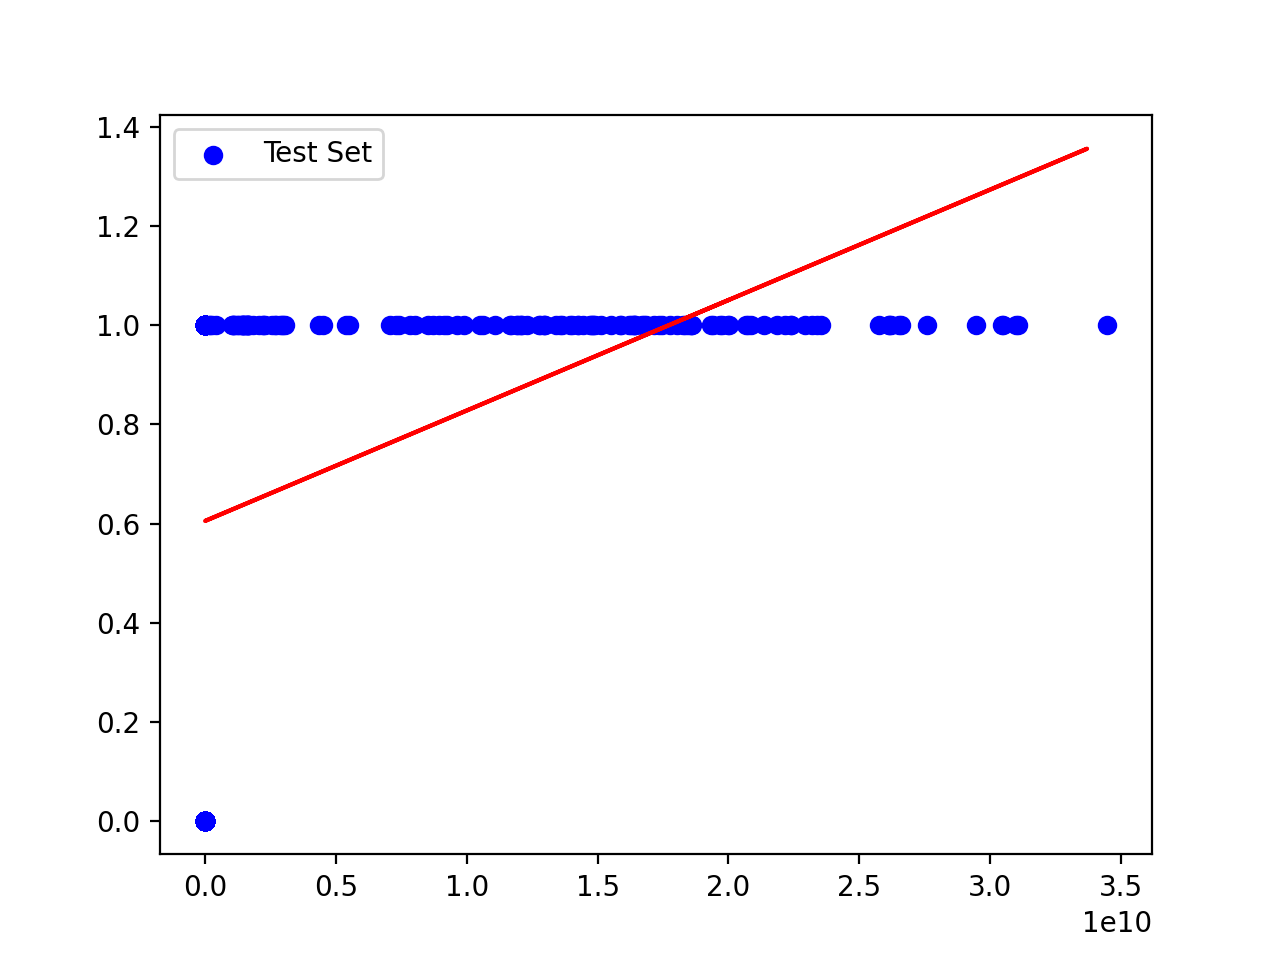

In [62]:
plt.scatter(X_test[selection], y_test, color='b', label='Test Set')
m, b = np.polyfit(X_train[selection], y_pred_lg, 1)
plt.plot(X_train[selection], m*X_train[selection]+b, color='r')
plt.legend()
plt.show()

### Step 05 - Test Score, Accuracy, Precision, Confusion Matrix, ROC Curve, MSE, MAE, and Cross-Validation

In [63]:
lr_model.score(X_train, y_train)

1.0

In [64]:
lr_model.score(X_test, y_test)

1.0

In [65]:
mse_lr = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_lg)

In [66]:
mse_lr

0.45530393325387364

In this step, we are testing the level of accuracy for the model - accuracy tells us how many times the Logistic Regression model was correct overall:

In [67]:
accuracy_lr = accuracy_score(y_true=y_test, y_pred=y_pred_lg)

In [68]:
accuracy_lr

0.5446960667461264

In this step, we are testing the level of precision for the model - precision tells us how good the Logistic Regression model is at predicting a specific category:

In [69]:
precision_lr = precision_score(y_test, y_pred_lg)

In [70]:
precision_lr

0.6372007366482505

In this step, we are testing the level of recall for the model - recall tells us how many times the  Logistic Regression model was able to detect a specific category:

In [71]:
recall_lr = recall_score(y_test, y_pred_lg)

In [72]:
recall_lr

0.6516007532956686

In this step, we are generating a confusion matrix - a confusion matrix tells us how many false negatives and postives our model made, compared to how many true negatives and positives:

In [73]:
def CM(y_true, y_pred):
    M = confusion_matrix(y_true, y_pred)
    out = pd.DataFrame(M, index=['Obs Sex F', 'Obs Sex M'], columns=['Pred Sex F', 'Pred Sex F'])
    return out

In [74]:
threshold = 0.5

In [75]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]

In [76]:
y_pred_cm = (y_pred_prob > threshold).astype(int)

In [77]:
CM(y_test, y_pred_cm)

,Pred Sex F,Pred Sex F
Obs Sex F,308,0
Obs Sex M,0,531


ROC curves in logistic regression are used for determining the best cutoff value for predicting whether a new observation is a failure or a success. We can see below that the ROC curve for the training data has no predictive power, but the ROC data for the testing data is very strong:

In [78]:
fpr, tpr, ths = roc_curve(y_train, y_pred_prob)

<IPython.core.display.Javascript object>


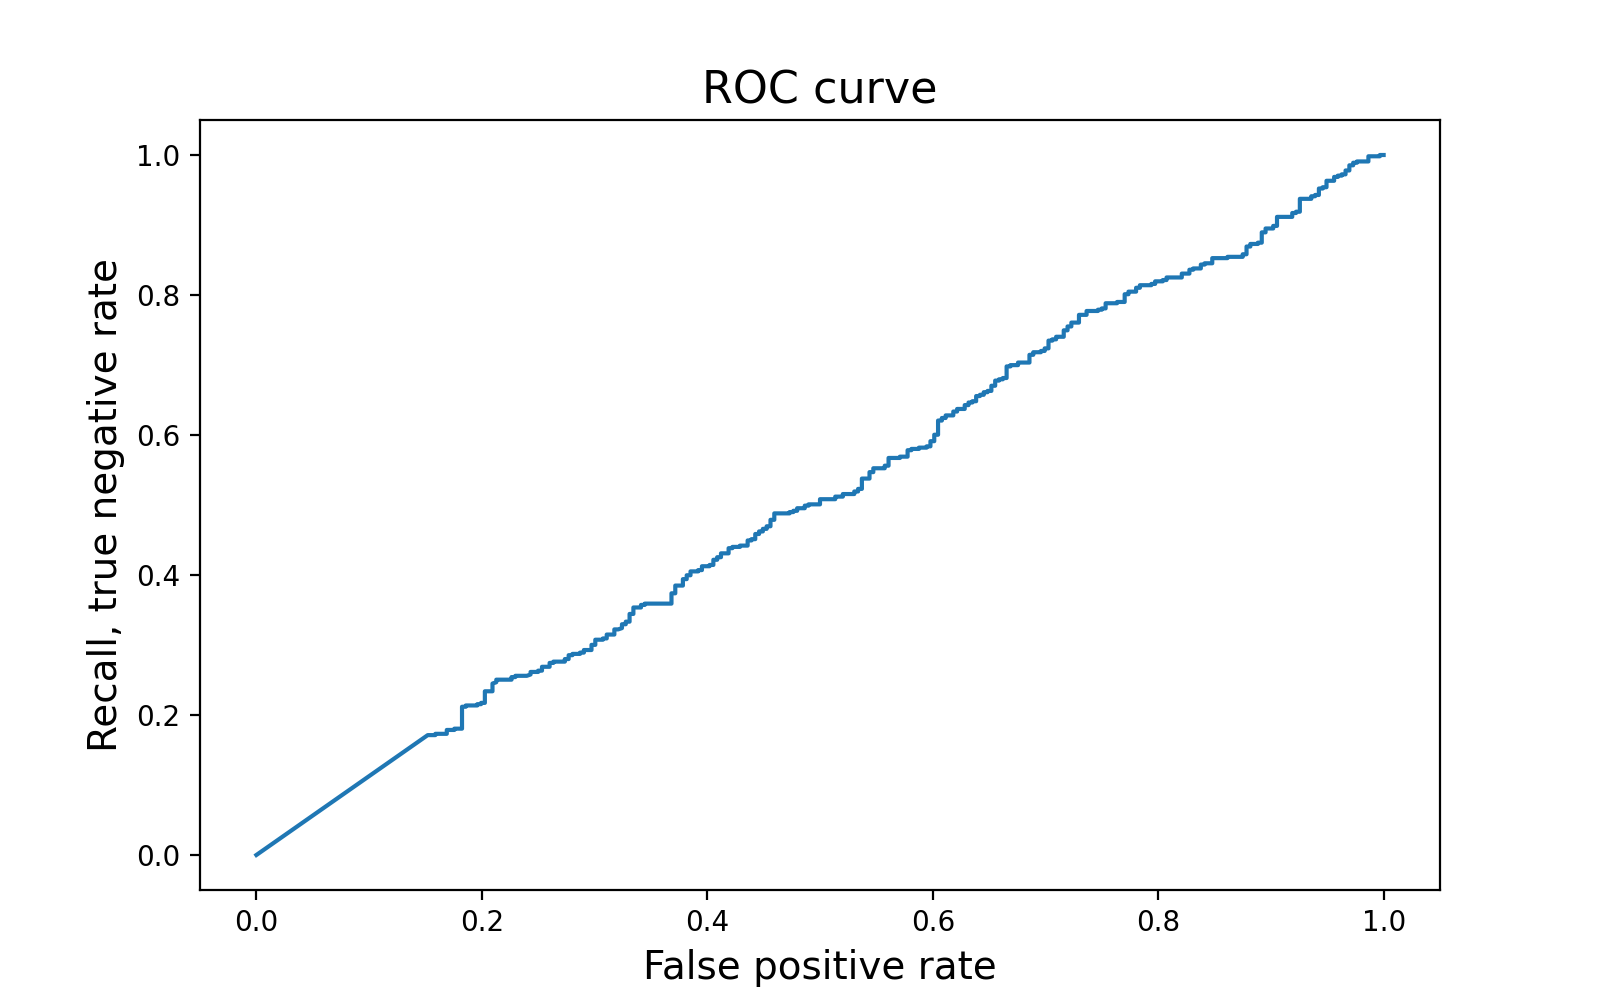

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.set_title('ROC curve', fontsize=16)
ax.set_xlabel('False positive rate', fontsize=14)
ax.set_ylabel('Recall, true negative rate', fontsize=14)
ax.grid;

In [81]:
fpr, tpr, ths = roc_curve(y_test, y_pred_prob)

<IPython.core.display.Javascript object>


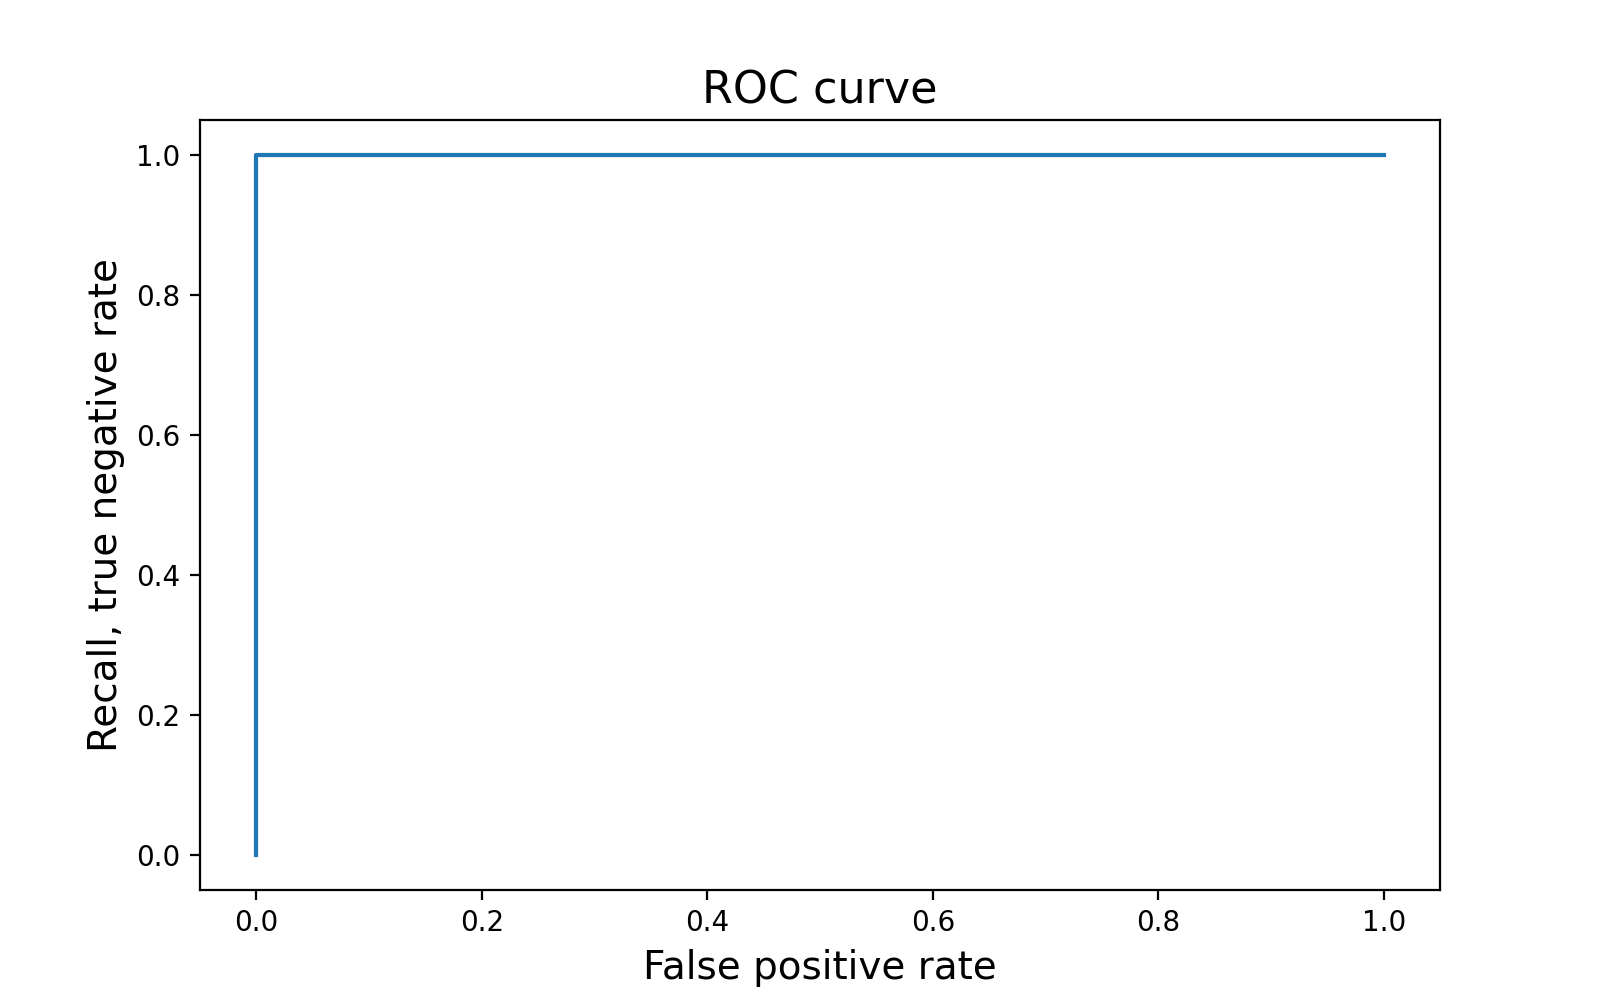

In [82]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.set_title('ROC curve', fontsize=16)
ax.set_xlabel('False positive rate', fontsize=14)
ax.set_ylabel('Recall, true negative rate', fontsize=14)
ax.grid;

In [84]:
numerical_features = ['Deaths', 'Death Rate', 'Age Adjusted Death Rate']

MSE and MAE indicate average amount of errors. Both Mean Square Error and Mean Absolute Error are below 0.5:

In [85]:
mae_lr = mean_absolute_error(y_true=y_test, y_pred = y_pred_lg)

In [86]:
mae_lr

0.45530393325387364

### Conclusion

Although accuracy for this model is ~0.54, both precision and recall are above 50%, at ~0.64 and ~0.65 respectively. Although the initial model performed okay with these numbers, perhaps a different model and different hyperparameters would improve results.